## Boston AirBnB open data with the CRISP-DM (Cross Industry Process for Data Mining)

To get general AirBnB business insight, the Boston data from AirBnB will be analyzed based on the CRISP-DM. The subprocesses of the CRISP-DM are written below.

`1`. Business Understanding

`2`. Data Understanding

`3`. Prepare Data

`4`. Data Modeling

`5`. Evaluate the Results

`6`. Deploy

In [39]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar #To check holidays in the U.S

In [2]:
# Load the AirBnB files
df_listing = pd.read_csv('./listings.csv')
df_calendar = pd.read_csv('./calendar.csv')
df_reviews = pd.read_csv('./reviews.csv')

## 1. Business Understanding

Business Questions 
    - What are the most relevant features of the groups over the 90 percentile and under the 10 percentile?
    - What are the most relevant features to be cared for the two traveler group and more than four traveler group?
    - How is the price of AirBnb adjusted in terms of seasons and locations?

## 2. Data Understanding

Check and play around the dataframes loaded before to get some idea or to get the business quesations progressed.
### 2.1. For df_listing

In [3]:
pd.set_option('display.max_columns', None)  

In [45]:
print(df_listing.shape)
df_listing.head(n=7)

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [33]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

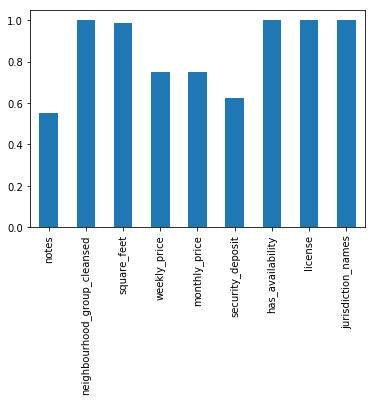

In [42]:
df_missing = df_listing.isna().mean()
df_missing[df_missing>0.5].plot.bar()

In [9]:
print("# of id:",df_listing.id.unique().size)
print("# of host_id:",df_listing.host_id.unique().size)
# There are some hosts who take care of more than two ids

# of id: 3585
# of host_id: 2181


# of accommodates: [ 4  2  3  5  1  8  6 16  7  9 10 12 11 14]
2     0.413668
4     0.181311
1     0.122455
3     0.119386
5     0.068340
6     0.056625
8     0.015342
7     0.010879
10    0.005300
9     0.002789
12    0.001395
11    0.001116
14    0.000837
16    0.000558
Name: accommodates, dtype: float64
Accomodates equal or less than 2 is 53.61 %
Accomodates more than 2 is 42.57 %


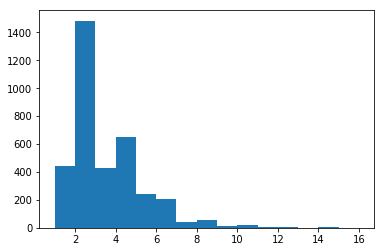

In [10]:
print("# of accommodates:",df_listing.accommodates.unique())
tmp = df_listing.accommodates.value_counts(ascending=False)/df_listing.accommodates.size
print(tmp)
print("Accomodates equal or less than 2 is {:5.2f} %".format((tmp[1]+tmp[2])*100))
print("Accomodates more than 2 is {:5.2f} %".format((tmp[3]+tmp[4]+tmp[5]+tmp[6])*100))
# 96% of total id can be categorized into the group with less than 2 people or the group with more than 2 people
plt.hist(df_listing.accommodates, bins=15)
plt.show()

In [43]:
print("# of bed_type:",df_listing.bed_type.unique())

# of bed_type: ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


### 2.2. For df_calendar

In [12]:
# Modify df_calendar for future work
# Special event : marathon, new academic season

def modify_calendar(df_calendar):
    '''
    Input : a Pandas dataframe having a date data column
    Output : a Pandas dataframe having year, month, day, weekday, us_holiday columns
    '''
    # Split date column into year, month,day, weekday columns
    # The day of the week with Monday=0, Sunday=6
    # Set the range of weekends from Friday to Sunday
    df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
    df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month
    df_calendar['day'] = pd.DatetimeIndex(df_calendar['date']).day
    df_calendar['weekday'] = pd.DatetimeIndex(df_calendar['date']).weekday
    df_calendar['number_of_week'] = pd.DatetimeIndex(df_calendar['date']).week
    df_calendar['price'].replace(to_replace="\$([0-9,\.]+).*", value=r"\1", regex=True, inplace=True)
    
    
    # Add us_holiday column
    cal = calendar()
    holidays = cal.holidays(start=df_calendar.date.min(), end=df_calendar.date.max())
    df_calendar['us_holiday'] = df_calendar.date.astype('datetime64').isin(holidays)
    
    # Add weekend column #Friday, Saturday
    weekend = [4,5]
    df_calendar['weekend'] = df_calendar.weekday.isin(weekend)
    
    # Replace values in weekday column 
    df_calendar['weekday'].replace({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday',4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
    
    
    return df_calendar

In [203]:
# cal = calendar()
# holidays = cal.holidays(start=df_calendar.date.min(), end=df_calendar.date.max())
# print(holidays)
# print(holidays.dayofweek)
# print()
# print(pd.date_range(start='1/1/2018', periods=8))

In [15]:
df_cal_modified = modify_calendar(df_calendar)
print(df_cal_modified.shape[0]/365)
df_cal_modified.tail(n=10)
# Each listing_id has 365 rows

3586.0


,listing_id,date,available,price,year,month,day,weekday,number_of_week,us_holiday,weekend
1308880,14504422,2016-09-15,f,NaN,2016,9,15,Thursday,37,False,False
1308881,14504422,2016-09-14,f,NaN,2016,9,14,Wednesday,37,False,False
1308882,14504422,2016-09-13,f,NaN,2016,9,13,Tuesday,37,False,False
1308883,14504422,2016-09-12,f,NaN,2016,9,12,Monday,37,False,False
1308884,14504422,2016-09-11,f,NaN,2016,9,11,Sunday,36,False,False
1308885,14504422,2016-09-10,f,NaN,2016,9,10,Saturday,36,False,True
1308886,14504422,2016-09-09,f,NaN,2016,9,9,Friday,36,False,True
1308887,14504422,2016-09-08,f,NaN,2016,9,8,Thursday,36,False,False
1308888,14504422,2016-09-07,f,NaN,2016,9,7,Wednesday,36,False,False
1308889,14504422,2016-09-06,f,NaN,2016,9,6,Tuesday,36,False,False


a      4
b      7
c     -5
d      3
e    181
dtype: int64

In [114]:
# def count_available(df_listing, df_cal_modified):
tmp = df_listing.id[0:5]

for i in np.nditer(tmp):
    tmp = df_cal_modified[(df_cal_modified.listing_id == i)] # Make a dataframe coming from df_listing with a certain id
    available_dict = tmp.available.value_counts().to_dict()
    print(available_dict)
    if 'f' in available_dict:
        unavailable_days = tmp[tmp.available == 'f'].shape[0]
    else:
        unavailable_days = 0

    if 't' in available_dict:
        available_weekends = tmp[(tmp.available == 't') & (tmp.weekend == True)].shape[0]
        available_weekdays = tmp[(tmp.available == 't') & (tmp.weekend == False)].shape[0]
#         print("available days:(weekends, weekdays)",available_weekends, available_weekdays)
        price_weekend = tmp[(tmp.weekend == True) & (tmp.available == 't')].price.astype(float).describe()['mean']
        price_weekday = tmp[(tmp.weekend == False) & (tmp.available == 't')].price.astype(float).describe()['mean']
#         print("price:(weekends, weekdays)",price_weekend, price_weekday)

    else:
        available_weekends = 0
        available_weekdays = 0
        price_weekend = np.nan
        price_weekday = np.nan

    print("unavailable days:", unavailable_days)
    print("available days:(weekends, weekdays)", available_weekends, available_weekdays)
    print("price:(weekends, weekdays)", price_weekend, price_weekday)
    print("**"*30)
    

df_listing['unavail_days'] = unavailable_days series
df_listing['avail_days_weekends'] = avail_days_weekends series
df_listing['avail_days_weekdays'] = avail_days_weekends series
df_listing['price_weekend'] = price_weekend series
df_listing['price_weekday'] = price_weekday series


test_frame = pd.DataFrame({'unavailable_days':sf.index, 'avail_days_weekends':sf.values, 'avail_days_weekdays':something,  'price_weekend':series, 'price_weekdays':series})
df1['e'] = pd.Series(np.random.randn(sLength), index=df1.index)
#     avail_weekday = df_cal_id[df_cal_id.weekend == False].available.value_counts()['t']  #count weekdays with available 't' 
#     avail_weekend = df_cal_id[df_cal_id.weekend == True].available.value_counts()['t'] #count weekends with available 't' 
#     price_weekday = df_cal_id[(df_cal_id.weekend == False) & (df_cal_id.available == 't')].price.astype(float).describe()['mean']
#     price_weekend = df_cal_id[(df_cal_id.weekend == True) & (df_cal_id.available == 't')].price.astype(float).describe()['mean']
    
#     print('unavail, avail_total,avail_weekday,avail_weekend', unavail,avail_total,avail_weekday,avail_weekend)
#     print("price_weekday","price_weekend",price_weekday,price_weekend)

{'f': 365}
unavailable days: 365
available days:(weekends, weekdays) 0 0
price:(weekends, weekdays) nan nan
************************************************************
{'t': 359, 'f': 6}
unavailable days: 6
available days:(weekends, weekdays) 101 258
price:(weekends, weekdays) 75.0 65.0
************************************************************
{'t': 319, 'f': 46}
unavailable days: 46
available days:(weekends, weekdays) 91 228
price:(weekends, weekdays) 65.0 65.0
************************************************************
{'f': 267, 't': 98}
unavailable days: 267
available days:(weekends, weekdays) 66 32
price:(weekends, weekdays) 75.0 75.0
************************************************************
{'t': 334, 'f': 31}
unavailable days: 31
available days:(weekends, weekdays) 93 241
price:(weekends, weekdays) 79.0 79.0
************************************************************


In [101]:
# 내가 원하는거 : 
## Available 't', 'f' 값 확인
## Available 't' 에서 주중t, 주말t 분리 후
## Available 주중t 의 평균 price, 주말t의 평균 price

tmp = df_cal_modified[(df_cal_modified.listing_id == 5706985)]
available_dict = tmp.available.value_counts().to_dict()
print(available_dict)
if 'f' in available_dict:
    print(tmp[tmp.available == 'f'].shape)
    unavailable_days = tmp[tmp.available == 'f'].shape[0]
    
if 't' in available_dict:
    print(tmp[tmp.available == 't'].shape)
    
    available_weekends = tmp[(tmp.available == 't') & (tmp.weekend == True)].shape[0]
    available_weekdays = tmp[(tmp.available == 't') & (tmp.weekend == False)].shape[0]
    print(available_weekends, available_weekdays)
    price_weekend = tmp[(tmp.weekend == True) & (tmp.available == 't')].price.astype(float).describe()['mean']
    price_weekday = tmp[(tmp.weekend == False) & (tmp.available == 't')].price.astype(float).describe()['mean']
    print(price_weekend, price_weekday)

# tmp1 = tmp.available.value_counts()
# print(len(tmp1))
# empty_list = []
# for i in range(len(tmp1)):
#     j = (tmp.available.value_counts().index[i], tmp.available.value_counts()[i])
#     empty_list.append(j)
    
# print(empty_list)


# price_weekday = tmp[(tmp.weekend == False) & (tmp.available == 't')].price.astype(float).describe()['mean']
# price_weekend = tmp[(tmp.weekend == True) & (tmp.available == 't')].price.astype(float).describe()['mean']
# print(price_weekday,price_weekend)


{'t': 344, 'f': 21}
(21, 11)
(344, 11)
96 248
126.5625 106.0241935483871


In [19]:
# print("Total available days of id 14504422:", df_cal_modified[(df_cal_modified.listing_id == 14504422) & (df_cal_modified.available == 't')].shape[0])
# print("Total unavailable days of id 14504422:", df_cal_modified[(df_cal_modified.listing_id == 14504422) & (df_cal_modified.available == 'f')].shape[0])
# print()
# print("Total available days of weekends or holidays of id 14504422:", df_cal_modified[(df_cal_modified.listing_id == 14504422) & (df_cal_modified.available == 't') 
#                                                                          & (df_cal_modified.weekend == True)].shape[0])
# print("Total available days of weekdays of id 14504422:", df_cal_modified[(df_cal_modified.listing_id == 14504422) & (df_cal_modified.available == 't') 
#                                                                          & (df_cal_modified.weekend == False)].shape[0])

Total available days of id 14504422: 165
Total unavailable days of id 14504422: 200

Total available days of weekends or holidays of id 14504422: 50
Total available days of weekdays of id 14504422: 115


In [20]:
# print("# of listing_id:", df_calendar.listing_id.unique().size)
# print(df_calendar.date.min())
# print(df_calendar.date.max())
# # The number of listing_id in df_calendar is 3585 as the same as the number of id in df_listing
# # df_calendar has one year data from 2016-09-06 to 2017-09-05
# # date column can be seprated into year, month, day, week, weekend, official holiday.

# of listing_id: 3585
2016-09-06
2017-09-05
